In [ ]:
%cd "/content/drive/MyDrive/main-project"

/content/drive/MyDrive/main-project


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [ ]:
data = pd.read_csv("datasets/tweet/tweet_emotions.csv")

In [ ]:
data

,tweet_id,sentiment,content
0,1956967666,sad,Layin n bed with a headache ughhhh...waitin o...
1,1956967696,sad,Funeral ceremony...gloomy friday...
2,1956968416,neutral,@dannycastillo We want to trade with someone w...
3,1956968477,fear,Re-pinging @ghostridah14: why didn't you go to...
4,1956968487,sad,"I should be sleep, but im not! thinking about ..."
...,...,...,...
31086,1753918881,neutral,@jasimmo Ooo showing of your French skills!! l...
31087,1753918892,neutral,"@sendsome2me haha, yeah. Twitter has many uses..."
31088,1753918900,happy,Succesfully following Tayla!!
31089,1753918954,neutral,@JohnLloydTaylor


In [ ]:
data.drop('tweet_id',axis=1,inplace=True)

In [ ]:
data.value_counts('sentiment')

sentiment
neutral     8638
fear        8459
happy       5209
sad         5165
surprise    2187
disgust     1323
angry        110
dtype: int64

In [ ]:
idx = data[(data['sentiment']=='disgust') | (data['sentiment']=='fear') | (data['sentiment']=='angry') | (data['sentiment']=='surprise')].index

In [ ]:
idx

Int64Index([    3,     5,     9,    12,    15,    17,    19,    21,    23,
               25,
            ...
            31047, 31050, 31051, 31053, 31058, 31060, 31072, 31073, 31074,
            31079],
           dtype='int64', length=12079)

In [ ]:
data.drop(idx , inplace=True)

In [ ]:
data

,sentiment,content
0,sad,Layin n bed with a headache ughhhh...waitin o...
1,sad,Funeral ceremony...gloomy friday...
2,neutral,@dannycastillo We want to trade with someone w...
4,sad,"I should be sleep, but im not! thinking about ..."
6,sad,@charviray Charlene my love. I miss you
...,...,...
31086,neutral,@jasimmo Ooo showing of your French skills!! l...
31087,neutral,"@sendsome2me haha, yeah. Twitter has many uses..."
31088,happy,Succesfully following Tayla!!
31089,neutral,@JohnLloydTaylor


In [ ]:
data.value_counts('sentiment')

sentiment
neutral    8638
happy      5209
sad        5165
dtype: int64

In [ ]:
#text preprocessing
ps = PorterStemmer()

def preprocess(line):
    review = re.sub('[^a-zA-Z]', ' ', line) #leave only characters from a to z
    review = review.lower() #lower the text
    review = review.split() #turn string into list of words
    #apply Stemming 
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #delete stop words like I, and ,OR   review = ' '.join(review)
    #trun list into sentences
    return " ".join(review)

In [ ]:
import nltk
nltk.download('stopwords')
data['content']=data['content'].apply(lambda x: preprocess(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data

,sentiment,content
0,sad,layin n bed headach ughhhh waitin call
1,sad,funer ceremoni gloomi friday
2,neutral,dannycastillo want trade someon houston ticket...
4,sad,sleep im think old friend want marri damn amp ...
6,sad,charviray charlen love miss
...,...,...
31086,neutral,jasimmo ooo show french skill lol thing good l...
31087,neutral,sendsom haha yeah twitter mani use know ppl care
31088,happy,succes follow tayla
31089,neutral,johnlloydtaylor


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['label'] = label_encoder.fit_transform(data['sentiment'])

In [ ]:
data

,sentiment,content,label
0,sad,layin n bed headach ughhhh waitin call,2
1,sad,funer ceremoni gloomi friday,2
2,neutral,dannycastillo want trade someon houston ticket...,1
4,sad,sleep im think old friend want marri damn amp ...,2
6,sad,charviray charlen love miss,2
...,...,...,...
31086,neutral,jasimmo ooo show french skill lol thing good l...,1
31087,neutral,sendsom haha yeah twitter mani use know ppl care,1
31088,happy,succes follow tayla,0
31089,neutral,johnlloydtaylor,1


In [ ]:
sorted(set(data['sentiment']))

['happy', 'neutral', 'sad']

In [ ]:
# Creating the Bag of Words model by applying Countvectorizer -convert textual data to numerical data


from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))#example: the course was long-> 
#[the,the course,the course was,course, course was, course was long,...]
cv.fit(data['content'])
data_cv = cv.transform(data['content']).toarray()

import pickle 
pickle.dump(cv, open('models/cv.pkl', 'wb'))

In [ ]:
data_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(data_cv, data['label'], test_size=0.25, random_state=42)

In [ ]:
X_train.shape

(14259, 5000)

In [ ]:
print("class 0 : {}".format(sum(y_train == 0)))
print("class 1 : {}".format(sum(y_train == 1)))
print("class 2 : {}".format(sum(y_train == 2)))


from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
  

class 0 : 3925
class 1 : 6524
class 2 : 3810


In [ ]:
print("class 0 : {}".format(sum(y_train_res == 0)))
print("class 1 : {}".format(sum(y_train_res == 1)))
print("class 2 : {}".format(sum(y_train_res == 2)))

class 0 : 6524
class 1 : 6524
class 2 : 6524


In [ ]:
import datetime
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau,CSVLogger
import tensorflow as tf
chk_path = 'models/txt_emo.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')


                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=4, 
                              verbose=1, 
                              min_delta=0.0001)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr]

In [ ]:
# first neural network with keras tutorial
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam

# load the dataset
# split into input (X) and output (y) variables
# define the keras model


model = Sequential()
model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
# compile the keras model


# model = Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1],1,1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

opt = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit the keras model on the dataset
hist = model.fit(X_train_res, y_train_res,validation_data=(X_test, y_test), epochs=100, batch_size=128, callbacks=callbacks)
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60012     
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 60,143
Trainable params: 60,143
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
152/153 [============================>.] - ETA: 0s - loss: 1.0907 - accuracy: 0.4072
Epoch 1: val_loss improved from inf to 1.07437, saving model to models/txt_emo.h5
153/153 [==============================] - 3s 14ms/step - loss: 1.0906 - accuracy: 0.4073 - val_loss: 1.0744 - val_accuracy: 0.4894 - lr:

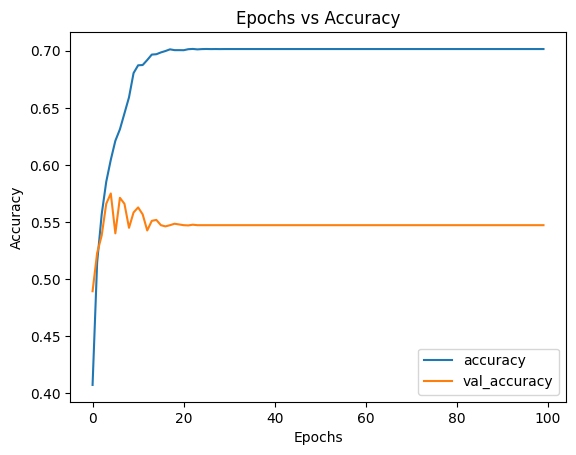

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(hist.history['accuracy'],label="accuracy")
plt.plot(hist.history['val_accuracy'],label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Epochs vs Accuracy")
plt.show()

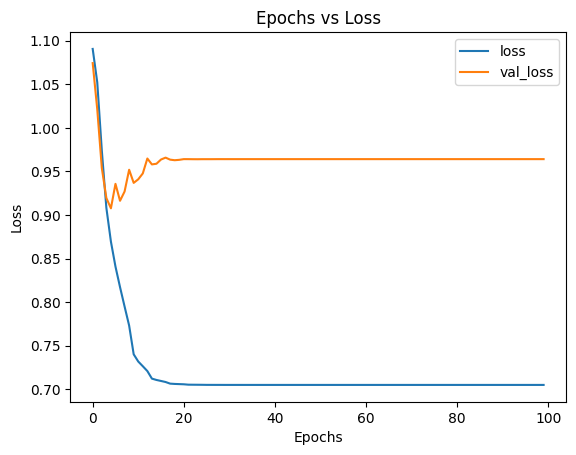

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(hist.history['loss'],label="loss")
plt.plot(hist.history['val_loss'],label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Epochs vs Loss")
plt.show()

In [ ]:
pred = model.predict(X_test)

149/149 [==============================] - 0s 2ms/step


In [ ]:
pred

array([[0.0381425 , 0.9500379 , 0.01181957],
       [0.634099  , 0.20805971, 0.15784116],
       [0.16968744, 0.5916011 , 0.2387114 ],
       ...,
       [0.62530106, 0.36245686, 0.01224204],
       [0.6541118 , 0.30293682, 0.04295143],
       [0.57287234, 0.19223069, 0.23489699]], dtype=float32)

In [ ]:
import numpy as np
pred_class = [np.argmax(x) for x in pred]

In [ ]:
from sklearn import metrics

print('Accuracy :',metrics.accuracy_score(y_test,pred_class))

Accuracy : 0.5472333263202188


In [ ]:
print(metrics.classification_report(y_test,pred_class))

              precision    recall  f1-score   support

           0       0.52      0.62      0.56      1284
           1       0.58      0.48      0.53      2114
           2       0.54      0.58      0.56      1355

    accuracy                           0.55      4753
   macro avg       0.55      0.56      0.55      4753
weighted avg       0.55      0.55      0.55      4753



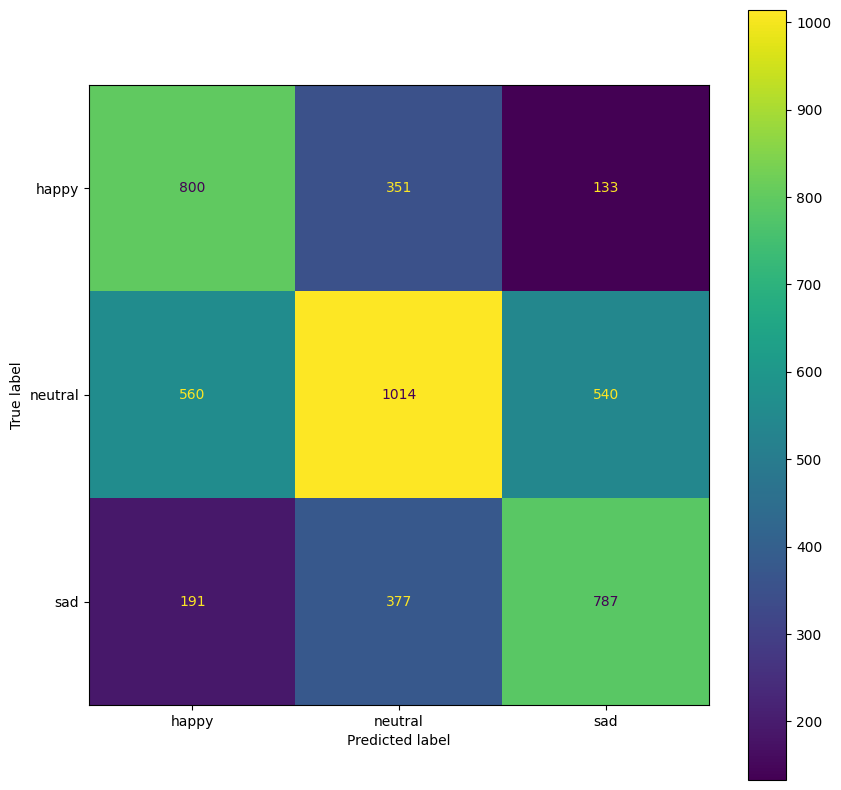

In [ ]:
cm = metrics.confusion_matrix(y_test, pred_class)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['happy', 'neutral', 'sad'])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.show()

# Predict

In [ ]:
sample = ["I am very sad","i am very happy"]
sample=[preprocess(x) for x in sample]

In [ ]:
data_cv2 = cv.transform(sample).toarray()

In [ ]:
data_cv2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
preds = model.predict(data_cv2)

1/1 [==============================] - 0s 22ms/step


In [ ]:
preds

array([[0.00599866, 0.02311234, 0.970889  ],
       [0.8712325 , 0.04250932, 0.08625823]], dtype=float32)

In [ ]:
preds_class = [np.argmax(x) for x in preds]

In [ ]:
preds_class

[2, 0]

In [ ]:
for x in preds_class:
  print(sorted(set(data['sentiment']))[x])

sad
happy
